In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Variant

In [2]:
ord("S") % 5 + 1

4

In [3]:
nationalNames = pd.read_csv("NationalNames.csv")

### Assignments

#### task 1:  Output the first 8 rows of the dataset

In [84]:
nationalNames.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


#### task 3:  Get the names of dataset columns

In [5]:
nationalNames.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

#### task 6:  Calculate the number of unique female and male names in whole dataset

In [6]:
# approach 1
nationalNames.groupby(['Gender'])['Name'].nunique().reset_index()

,Gender,Name
0,F,64911
1,M,39199


In [7]:
# approach 2
nationalNames.groupby('Gender').agg({'Name': 'nunique'})

,Name
Gender,
F,64911
M,39199


#### task 7:   Find 5 the most popular male names in 2010

In [8]:
nationalNames[(nationalNames['Year'] == 2010) & (nationalNames['Gender'] == 'M')].sort_values(by='Count', ascending=False).head(5)

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


#### task 8:  Find the most popular name based on the results of one year (the name for which Count is maximum)

In [9]:
year = nationalNames[(nationalNames['Year'] == 1947)]
popular_name = year['Name'].value_counts().idxmax()
print(f'The name is {popular_name} in 1947 ')

The name is Linda in 1947 


#### task 13:   Find the year when the name “Jacob” was the most popular as a female name

In [10]:
df = nationalNames[(nationalNames['Name'] == 'Jacob') &( nationalNames['Gender'] == 'F')]
df[df['Count'] == df['Count'].max()]

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


#### task 14:  Find year, with the most number of gender neutral names (the same male and female names)

In [99]:
gender_counts = nationalNames.groupby(['Year', 'Name'])['Gender'].nunique().reset_index(name='UniqueGenders')

gender_neutral_counts = gender_counts[name_gender_counts['UniqueGenders'] == 2]
gender_neutral_counts

gender_neutral_counts_by_year = gender_neutral_counts.groupby('Year')['Name'].count().reset_index(name='Gender_neutral_counts')
final_result = gender_neutral_counts_by_year.groupby('Year').agg({'Gender_neutral_counts' : 'max'})
final_result[final_result['Gender_neutral_counts'] == final_result['Gender_neutral_counts'].max()]

,Gender_neutral_counts
Year,
2008,2557


#### task 15:  Find total births per year

In [14]:
total_birth = nationalNames.groupby('Year')[['Count']].sum()
total_birth.head(5)

,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467


#### task 16:   Find the year when the greatest number of children was born

In [15]:
max_index = total_birth['Count'].idxmax()
max_index

1957

#### task 17:  Find the number of girls and boys that were born in each year

In [16]:
all_births = nationalNames.groupby(['Year','Gender'])['Count'].sum().unstack()
all_births.head(5)

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


#### task 19:  Draw the plot of total births per year of boys and girls

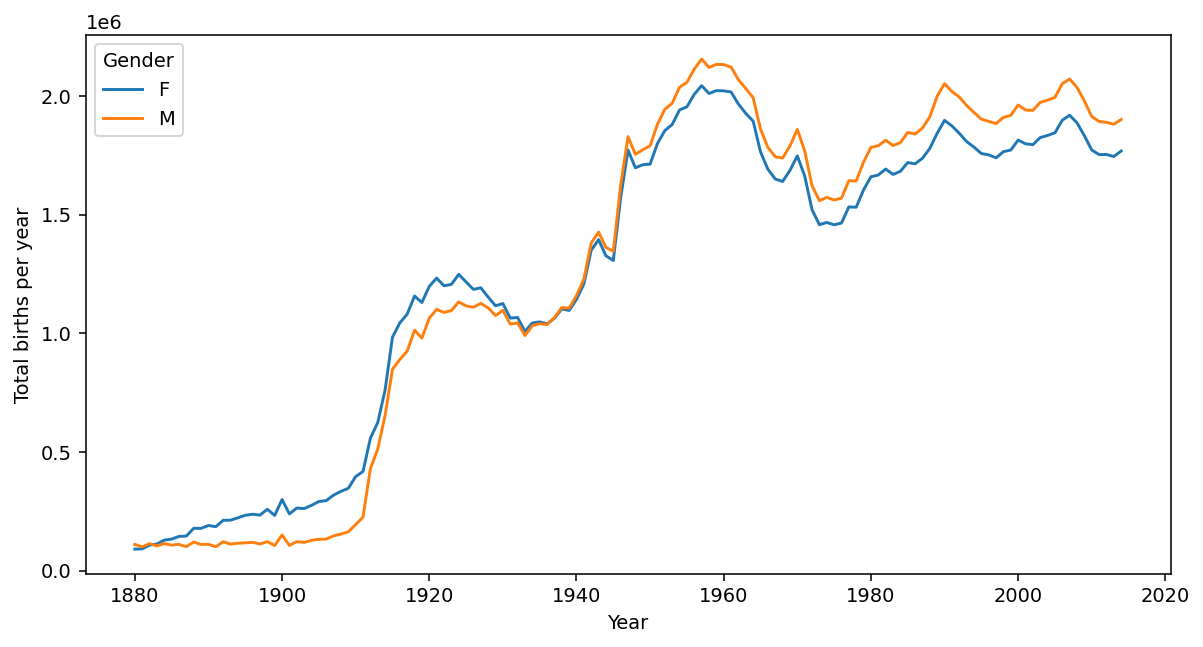

In [17]:
plt.figure(figsize=(10, 5), dpi=140)

plt.plot(all_births.index, all_births['F'], label='F')
plt.plot(all_births.index, all_births['M'], label='M')

plt.xlabel('Year')
plt.ylabel('Total births per year')

plt.legend(title = "Gender")

#### task 20:  Count number of gender neutral names (same for girls and boys)

In [18]:
neutral_names = nationalNames.groupby('Name').nunique()
gender_neutral_names = neutral_names[neutral_names['Gender'] == 2]
gender_neutral_names['Count'].count()

10221

#### task 22:  Calculate how many years the observation was carried out

In [19]:
print(f"The observation was carried out for {nationalNames['Year'].nunique()} years")

The observation was carried out for 135 years


#### task 24:  Find the most popular unpopular names (unpopular name that babies have been called the most times)

In [43]:
# here we got the least common names, then we found thier counts, then we found the one with most count number.
most_popular_unpopular_names = nationalNames[nationalNames['Count' ] == 5]
result = most_popular_unpopular_names.groupby('Name')[['Count']].sum()
print(f"{result['Count'].idxmax()} is the most popular unpopular name. This name was given to {result['Count'].max()} babies")

Celester is the most popular unpopular name. This name was given to 160 babies


#### task 25:  Plot graphs of the distribution of the number of names “John” and “Mary” by years, regardless of gender.

In [100]:
john_mary_names = nationalNames[(nationalNames['Name'] == 'John') | (nationalNames['Name'] == 'Mary')]
john_mary_names.head(3)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
228,229,John,1880,F,46
942,943,John,1880,M,9655


In [101]:
john_mary_names_total = john_mary_names.groupby(['Year','Name'])['Count'].sum().unstack()
john_mary_names_total.head(3)

Name,John,Mary
Year,,
1880,9701,7092
1881,8795,6948
1882,9597,8178


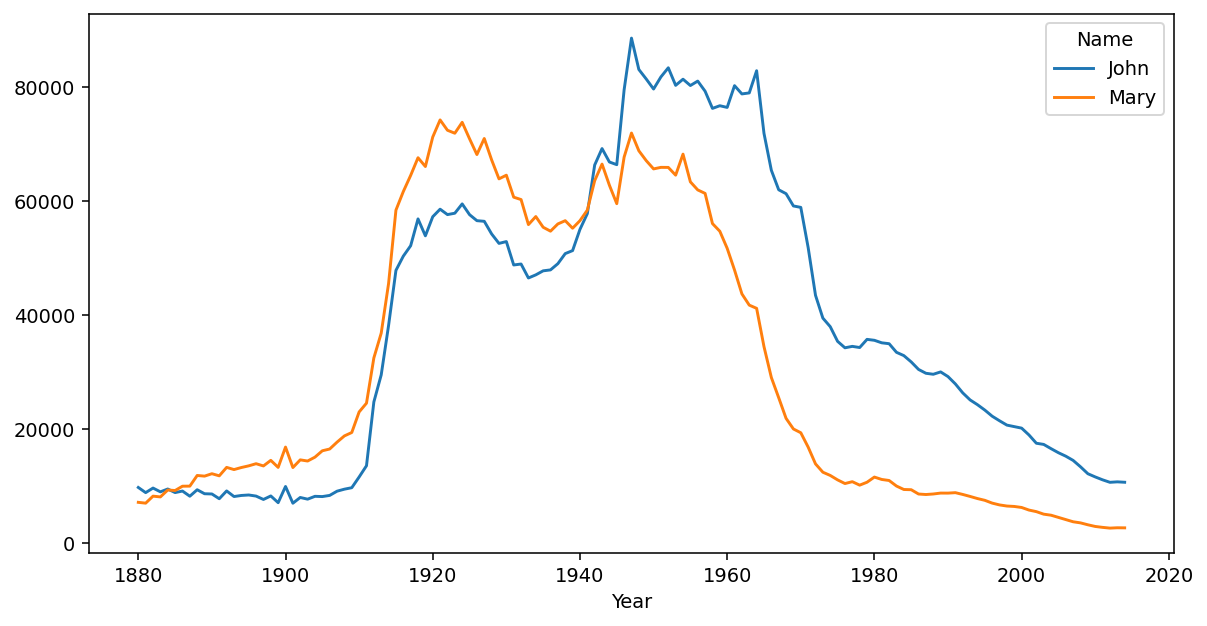

In [102]:
plt.figure(figsize=(10, 5), dpi=140)

plt.plot(john_mary_names_total.index, john_mary_names_total['John'], label='John')
plt.plot(john_mary_names_total.index, john_mary_names_total['Mary'], label='Mary')

plt.xlabel('Year')

plt.legend(title = "Name")

#### task 26:  Plot graphs of the distribution of the number of female names “John” and male names “Mary” by years


In [106]:
m_mary_f_john_counts = nationalNames[((nationalNames['Name'] == 'John') &  (nationalNames['Gender'] == 'F')) | ((nationalNames['Name'] == 'Mary') &  (nationalNames['Gender'] == 'M'))]
m_mary_f_john_counts

,Id,Name,Year,Gender,Count
228,229,John,1880,F,46
1273,1274,Mary,1880,M,27
2312,2313,John,1881,F,26
3238,3239,Mary,1881,M,29
4212,4213,John,1882,F,40
...,...,...,...,...,...
1735496,1735497,John,2012,F,11
1756675,1756676,Mary,2012,M,6
1766701,1766702,John,2013,F,16
1800575,1800576,John,2014,F,14


In [108]:
m_mary_f_john_total = m_mary_f_john_counts.groupby(['Year', 'Name'])['Count'].sum().unstack()

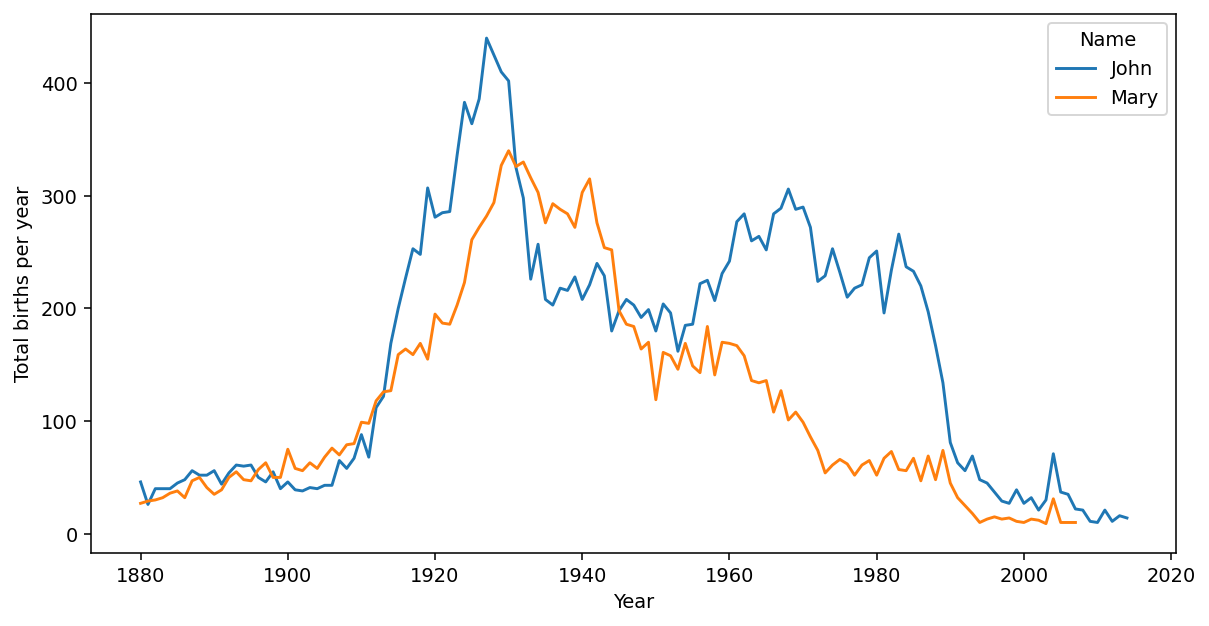

In [109]:
plt.figure(figsize=(10, 5), dpi=140)

plt.plot(m_mary_f_john_total.index, m_mary_f_john_total['John'], label='John')
plt.plot(m_mary_f_john_total.index, m_mary_f_john_total['Mary'], label='Mary')

plt.xlabel('Year')
plt.ylabel('Total births per year')

plt.legend(title = "Name")

#### task 27:  Find the most popular names each year

In [63]:
popular_names = nationalNames.groupby(['Year'])['Count'].idxmax()
nationalNames.loc[popular_names, ['Year', 'Name']]
# it means using these ids, get corresponding year and name coulumns

,Year,Name
942,1880,John
2938,1881,John
4963,1882,John
7116,1883,John
9318,1884,John
...,...,...
1657592,2010,Isabella
1691633,2011,Sophia
1725502,2012,Sophia
1759186,2013,Sophia
